In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
from cust_funcs import *

In [3]:
X_test,weights,y_test=prepare_dataset(remove_phi_cols(pd.read_csv('Data/testing.csv',index_col=0)))
X_train,_,y_train=prepare_dataset(remove_phi_cols(pd.read_csv('Data/training.csv')))


X_test=prepare_training_features(X_test,X_dep=X_train)

In [4]:
X_train=X_train.values
y_train=y_train.values
#y_test=y_test.values

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.2,stratify=y_test,random_state=42)

In [8]:
weights=weights.iloc[y_test.index]
y_test=y_test.values

## Training DNN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

2023-05-21 17:16:58.286281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 17:16:58.413097: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-21 17:16:58.434638: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-21 17:16:58.843905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [10]:
from tensorflow.keras.optimizers import Adam

In [40]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [43]:
model.fit(X_train,y_train,epochs=600,batch_size=2048,callbacks=[early_stop],validation_data=(X_val,y_val))

Epoch 1/600
123/123 [==============================] - 1s 9ms/step - loss: 0.6627 - val_loss: 0.6140
Epoch 2/600
123/123 [==============================] - 1s 6ms/step - loss: 0.6062 - val_loss: 0.5866
Epoch 3/600
123/123 [==============================] - 1s 6ms/step - loss: 0.5841 - val_loss: 0.5666
Epoch 4/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5678 - val_loss: 0.5445
Epoch 5/600
123/123 [==============================] - 1s 6ms/step - loss: 0.5558 - val_loss: 0.5300
Epoch 6/600
123/123 [==============================] - 1s 6ms/step - loss: 0.5452 - val_loss: 0.5157
Epoch 7/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5363 - val_loss: 0.5079
Epoch 8/600
123/123 [==============================] - 1s 6ms/step - loss: 0.5283 - val_loss: 0.4937
Epoch 9/600
123/123 [==============================] - 1s 6ms/step - loss: 0.5202 - val_loss: 0.4939
Epoch 10/600
123/123 [==============================] - 1s 7ms/step - loss: 0.5154 - val_lo

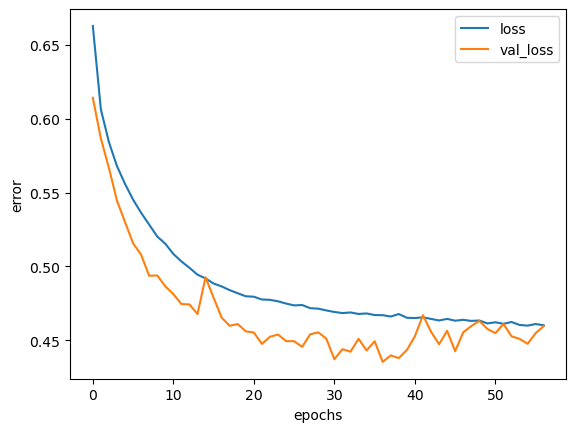

In [44]:
pd.DataFrame(model.history.history).plot()
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [45]:
prediction_proba=model.predict(X_test).reshape(len(y_test),)

11250/11250 [==============================] - 18s 2ms/step


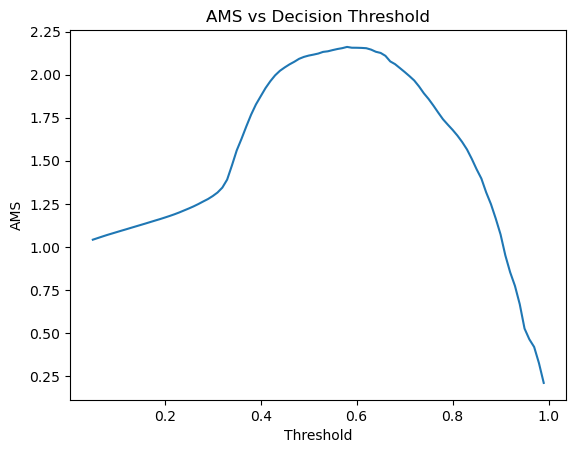

In [46]:
ams_dat,max_ams=ams_curve(prediction_proba,y_test,weights,test_ratio=0.8)

In [51]:
np.savetxt('Data/DNN_curve.csv',ams_dat)

In [50]:
print('Final AMS = {}'.format(max_ams))

Final AMS = 2.160602095162433
